<a href="https://colab.research.google.com/github/eunineelizze/ElizzeAP155/blob/master/Arzaga__AP155_Lab_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Full Name (Last Name, First Name)_: **Arzaga, Eunine Elizze J.**\
_Student No._: **2021-10771**\
_Section_: **THX-1**

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Eunine Elizze J. Arzaga

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

## PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

**Trapezoidal Rule**
$$I(a,b) \approx h \Bigg[\frac{1}{2}\Big(f(a) + f(b)\Big) + \sum_{k=1}^{N-1}f\big(a+kh\big)\Bigg]$$

where a, b are the endpoints, N is the number of slices and
$h = \frac{b-a}{N}$.

In [2]:
import numpy as np

# Defining a function for the integral
def f(x):
    return 2 * x**4 + 3 * x**2 + 4 * x + 5

# Function for trapezoidal rule
def trapezoidal_rule(N, a, b):
    h = (b - a) / N
    s = 0.5 * f(a) + 0.5 * f(b)
    for k in range(1, N):
        s += f(a + k * h)
    return h * s

# Manually computing the integral
def exact(x):
    return (2/5) * x**5 + (3/3) * x**3 + (4/2) * x**2 + 5 * x

# Calculating the exact integral
a = 0.0
b = 5.0
exact_value = exact(b) - exact(a)

# Function to calculate integral and percentage error
def calculate(N):
    trap_result = trapezoidal_rule(N, a, b)
    trap_error = abs((trap_result - exact_value) / exact_value) * 100
    return trap_result, trap_error

# Number of slices
N_values = [10, 100, 1000]

# Calculating for each number of slices
for N in N_values:
    trap_result, trap_error = calculate(N)
    print(f"Results for {N} slices:")
    print(f"  Trapezoidal rule: {trap_result:.5f} (Error: {trap_error:.5f}%)")

Results for 10 slices:
  Trapezoidal rule: 1471.43750 (Error: 1.47845%)
Results for 100 slices:
  Trapezoidal rule: 1450.21458 (Error: 0.01480%)
Results for 1000 slices:
  Trapezoidal rule: 1450.00215 (Error: 0.00015%)


*Analysis: Increasing the number of slices will decrease the deviation from the exact value.*

**Simpson's Rule**
$$\int_{-h}^{ h} (Ax^2 + Bx + C) dx = \frac{2}{3}Ah^3 + 2Ch = \frac{1}{3}h\Big[f(-h)+4f(0)+f(h)\Big]$$

where the integral evaluates the area under the quadratic curve from $-h$ to $h$.


In [3]:
import numpy as np

# Defining a function for the integral
def f(x):
    return 2 * x**4 + 3 * x**2 + 4 * x + 5

# Function for Simpson's rule
def simps(N, a, b):
    h = (b - a) / N
    s = f(a) + f(b)

    # Applying Simpson's rule
    for k in range(1, N, 2):
        s += 4 * f(a + k * h)
    for k in range(2, N, 2):
        s += 2 * f(a + k * h)

    s = s * (1/3) * h
    return s

# Manually computing the integral
def exact(x):
    return (2/5) * x**5 + (3/3) * x**3 + (4/2) * x**2 + 5 * x

# Calculate the exact integral value
a = 0.0
b = 5.0
exact_s = exact(b) - exact(a)

# Number of slices
N_values = [10, 100, 1000]

# Calculating for each number of slices
for N in N_values:
    simps_result = simps(N, a, b)
    simps_error = abs((simps_result - exact_s) / exact_s) * 100
    print(f"Results for {N} slices:")
    print(f"  Simpson's rule: {simps_result:.10f} (Error: {simps_error:.10f}%)")

Results for 10 slices:
  Simpson's rule: 1450.0833333333 (Error: 0.0057471264%)
Results for 100 slices:
  Simpson's rule: 1450.0000083333 (Error: 0.0000005747%)
Results for 1000 slices:
  Simpson's rule: 1450.0000000008 (Error: 0.0000000001%)


*Analysis: The Simpson's rule has a lower percent error than the Trapezoidal rule which means it is more precise in calculating the exact value.*

## PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

In [4]:
import numpy as np
from numpy import ones,copy,cos,tan,pi,linspace

# Defining the gaussxw function
def gaussxw(N):
    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3, 4*N-1, N) / (4*N + 2)
    x = cos(pi * a + 1 / (8*N*N * tan(a)))
    # Finding roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
      p0 = ones(N,float)
      p1 = copy(x)
      for k in range (1,N):
          p0,p1 = p1, ((2*k+1)*x*p1-k*p0)/(k+1)
      dp = (N+1)*(p0-x*p1)/(1-x*x)
      dx = p1/dp
      x -= dx
      delta = max(abs(dx))
    #Calculating the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x, w

In [5]:
# Defining a function for the integral
def f(x):
    return 2*x**4 + 3*x**2 + 4*x + 5

N = 3 # Number of slices
a = 0 # Lower limit
b = 5 # Upper limit

x, w = gaussxw(N)
# Rescaling for the integration limits to the required domain
xp = 0.5 * (b - a) * x + 0.5 * (b + a)
wp = 0.5 * (b - a) * w

# Calculating the integral
s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k])

print("USing Gaussian quadrature, we get ", s)

USing Gaussian quadrature, we get  1450.000000000002


## PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

Before we can use Gaussian Quadrature, we need to first generate the roots and weights for a Gaussian with N = 20.

In [6]:
import numpy as np

# Gaussian quadrature points and weights for N = 20
N = 20
points, weights = np.polynomial.legendre.leggauss(N)

print("Points: ", points)
print(" ")
print("Weights: ", weights)


Points:  [-0.9931286  -0.96397193 -0.91223443 -0.83911697 -0.74633191 -0.63605368
 -0.510867   -0.37370609 -0.22778585 -0.07652652  0.07652652  0.22778585
  0.37370609  0.510867    0.63605368  0.74633191  0.83911697  0.91223443
  0.96397193  0.9931286 ]
 
Weights:  [0.01761401 0.04060143 0.06267205 0.08327674 0.10193012 0.11819453
 0.13168864 0.14209611 0.14917299 0.15275339 0.15275339 0.14917299
 0.14209611 0.13168864 0.11819453 0.10193012 0.08327674 0.06267205
 0.04060143 0.01761401]


After finding the roots and weights of the Legendre Polynomial, we will approximate the integral over the given interval.

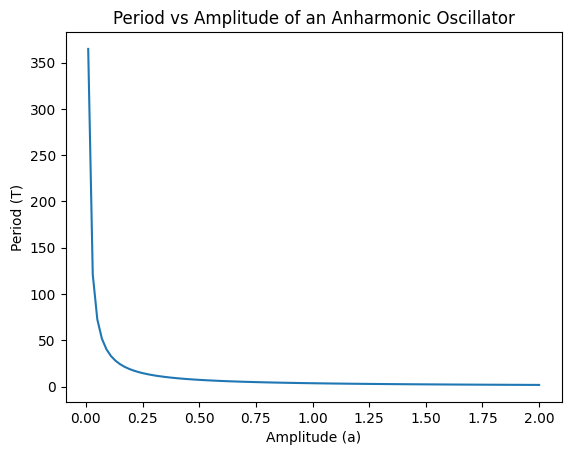

In [7]:
# Creating a list for the points and weights
x_i = np.array([-0.9931285991850949, -0.9639719272779138, -0.9122344282513259,
                -0.8391169718222188, -0.7463319064601508, -0.6360536807265150,
                -0.5108670019508271, -0.3737060887154196, -0.2277858511416451,
                -0.07652652113349733, 0.07652652113349733, 0.2277858511416451,
                0.3737060887154196, 0.5108670019508271, 0.6360536807265150,
                0.7463319064601508, 0.8391169718222188, 0.9122344282513259,
                0.9639719272779138, 0.9931285991850949])

w_i = np.array([0.01761400713915212, 0.04060142980038694, 0.06267204833410907,
                0.08327674157670475, 0.1019301198172404, 0.1181945319615184,
                0.1316886384491766, 0.1420961093183821, 0.1491729864726037,
                0.1527533871307259, 0.1527533871307259, 0.1491729864726037,
                0.1420961093183821, 0.1316886384491766, 0.1181945319615184,
                0.1019301198172404, 0.08327674157670475, 0.06267204833410907,
                0.04060142980038694, 0.01761400713915212])

# Function for the potential
def V(x):
    return x**4

# Function for computing the integrand
def integrand(t, a):
    x = (a / 2) * (1 + t)
    return 1 / np.sqrt(a**4 - x**4)

# Function for computing the period T a a given amplitude
def calculate_period(a):
    sum_integral = 0
    for i in range(20):
        sum_integral += w_i[i] * integrand(x_i[i], a)

    T = np.sqrt(8) * (a / 2) * sum_integral
    return T

# Outputting values of T for amplitudes from 0 to 2
amplitudes = np.linspace(0.01, 2, 100)
periods = [calculate_period(a) for a in amplitudes]

# Plotting the results
import matplotlib.pyplot as plt

plt.plot(amplitudes, periods)
plt.xlabel('Amplitude (a)')
plt.ylabel('Period (T)')
plt.title('Period vs Amplitude of an Anharmonic Oscillator')
plt.show()

The anharmonic potential $ V(x) = x^4 $ grows more steeply than the harmonic potential of lower degree as  $x$ increases. As a result, the restoring force is stronger for larger displacements, causing the period to increase with amplitude $a$.

As $ a \to 0 $, the period approaches a constant value, similar to that of a harmonic oscillator. Thus, the period tends to *flatten out* for small amplitudes, resulting in the initial behavior of the curve leveling off as $ a \to 0 $.

Due to the non-linear restoring force in the $x^4$ potential, the period increases with amplitude. This makes the particle take more time to return to the origin from larger amplitudes. This is also why the oscillator slows down significantly at larger amplitudes.

In summary:

- **For small amplitudes** $ a \to 0 $: The period should approach a constant value, reflecting harmonic oscillator behavior.
- **For large amplitudes**: The period should increase steadily with amplitude, reflecting the stronger restoring force in the anharmonic potential.